In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
import keras
from keras.preprocessing.image import ImageDataGenerator

### Read data

In [2]:
df = pd.read_csv('data/train.csv')
df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Randomly pick 5000 samples

In [3]:
data_df = df.sample(frac=1, random_state=0)[:5000]
data_df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16275,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19204,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def encodeTarget(target):
    return pd.get_dummies(target)

In [5]:
X = ((data_df.drop(['label'], axis=1)) / 255.0).values
Y = (encodeTarget(data_df.label)).values
print(X.shape, Y.shape)

(5000, 784) (5000, 10)


### Get a sample and plot it

(1, 28, 28, 1) (1, 10)


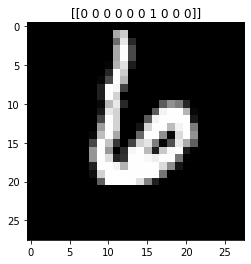

In [6]:
sample = 1

image = X[sample, :].reshape(1,28,28,1)
label = Y[sample, :].reshape(1, 10)
print(image.shape, label.shape)
fig = plt.figure
plt.imshow(image[0].reshape(28, 28), cmap='gray')
plt.title(str(label))
plt.show()

### Generate data

In [7]:
IG = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

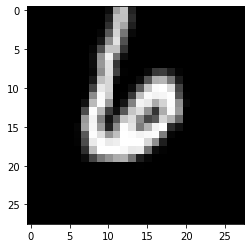

In [8]:
X_gen, Y_gen = IG.flow(image, label).next()
plt.imshow(X_gen[0].reshape(28,28),cmap='gray')

In [9]:
X_list = []
Y_list = []

for sample in tqdm(range(X.shape[0])):
    
    for i in range(5):
        X_gen, Y_gen = IG.flow(X[sample, :].reshape(1,28,28,1), Y[sample, :].reshape(1, 10)).next()
        X_list.append(X_gen.reshape(1, -1))
        Y_list.append(Y_gen.reshape(1, -1))

100%|██████████| 5000/5000 [00:12<00:00, 412.09it/s]


[[0 0 0 1 0 0 0 0 0 0]]


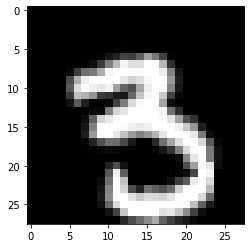

In [10]:
sample = 4
print(Y_list[sample])
plt.imshow(X_list[sample].reshape(28,28),cmap='gray')

In [11]:
X_generated = np.array(X_list).reshape(len(X_list), -1)
Y_generated = np.array(Y_list).reshape(len(Y_list), -1)
X_generated.shape, Y_generated.shape

((25000, 784), (25000, 10))

#### Augmentated dataset

In [12]:
df_generated = pd.DataFrame(X_generated)
df_generated.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.247465,0.152891,0.098755,0.030253,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
len(df_generated)

25000